In [1]:
all = [var for var in globals() if var[0] != '_']
for var in all:
    del var
del all

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time, datetime, sys, os
from module_opt import *

In [3]:
def range_breguet(x):
    
    x = x.astype(float)

    V = x[0]
    h = x[1]

    V[np.where(V <= 1)] = 1
    V[np.where(V >= 400)] = 400
    
    h[np.where(h <= 0)] = 0
    h[np.where(h >= 44300)] = 44300

    # if h <= 0:
    #     h = 0
    # elif h >= 44300:
    #     h = 44300
    # else:
    #     pass

    # Parameter setting
    g = 9.81 # Gravity acceleration [m*s2]
    c = 343 # Sound speed [m/s]
    e = .8 # Oswald efficiency factor
    C_D0 = .0083 # Zero lift drage coefficient
    AR = 10 # Aspect ratio of the wing
    S = 100 # Platform area [m2]
    W_e = 162400 # Empty weight of the aircraft [kg]
    W_fuel = 146571 # Initial fuel weigh of the aricraft [kg]
    A_t = 1.3295 # Surface area of the turbine [m2]
    FAR = .1 # Fuel ratio over the air

    fuel_remain = .75 # Fuel remaining level after flight

    # Intermediate variables
    rho_air = 1.2*(1 - .0065*h/288)**5.26 # Air density [kg/m3]
    W_f = W_e + (W_fuel*fuel_remain) # Weight of the aircraft after flight [kg]
    L = W_f*g # Lift force [N]
    C_L = 2*L/(rho_air*(V**2)*S) # Lift Coefficient
    C_WD = 10*(np.arctan(10*((V/(.7*c))**2 - 1)) + .5*np.pi) # Wave drag coefficient
    # C_WD = 0.06*np.maximum(0.0, (V/c)-0.72)**2
    C_D = C_D0 + (C_L**2)/(np.pi*e*AR) + C_WD # Drag coefficient
    D = .5*C_D*rho_air*(V**2)*S # Drag force [N]
    T = D # Thrust force = Drag force [N]
    W_i = W_e + W_fuel # Initial weight of the aircraft [kg]
    m_air = V*A_t*rho_air # Mass rate of air [kg/s]
    m_f = m_air*FAR # Mass rate of fuel [kg/s]
    c_t = m_f/T + 1e-5 # Specific fuel consumption [kg/(s*N)]

    # Range
    result = (V/c_t)*(C_L/C_D)*np.log(W_i/W_f) # Maximum range of aircraft from Breguet Eqn [m]
    # Range = np.round(Range*.001)

    return result

In [11]:
### Design variables
# # One value
# h = 10000 # Altitude [m]
# V = 150 # Cruise Velocity [m/s]

# Ranged values
resolution = .01
step_V = 50*resolution
step_h = 5000*resolution
V_lim = 600 # [m/s]
h_lim = 50000 # [m]
grid = np.meshgrid(np.arange(0, 600+step_V, step_V), np.arange(0, 50000+step_h, step_h))
grid

V = grid[0]
h = grid[1]

Text(0.5, 1.0, 'Maximum range of aircraft vs Velocity, Altitude')

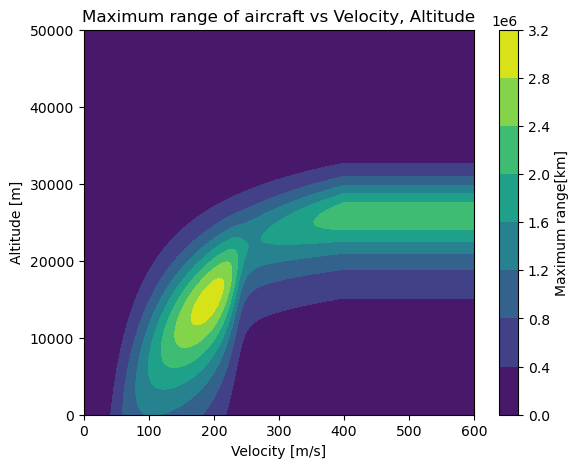

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6.3, 5))
contourf = ax.contourf(grid[0], grid[1], range_breguet(np.array([V, h])))
colorbar = fig.colorbar(contourf, ax=ax)
colorbar.set_label('Maximum range[km]')
ax.set_xlabel('Velocity [m/s]')
ax.set_ylabel('Altitude [m]')
ax.set_title('Maximum range of aircraft vs Velocity, Altitude')

In [6]:
import scipy

In [ ]:
scipy.optimize.minimize()

In [ ]:
func = lambda x : -1 * range_breguet(x)
# x_cur = [100, 5000]
x_cur = [100, 1000]
# stp_descent(func=func, x_cur=x_cur, tol=1e-2) # (193, 14856) 12만번, 1분40초
# cg_hs(func=func, x_cur=x_cur, tol=1e-2) # (193, 14856) 34번, 0초
# cg_fr(func=func, x_cur=x_cur, tol=1e-2) # (497, 25886)로 빠짐
# newton(func=func, x_cur=x_cur, tol=1e-2) # grad*p > 0 ... 무한루프 빠짐
quasi_newton_bfgs(func=func, x_cur=x_cur, tol=1e-2) # (193, 14856) 10번, 0초

x0 : [ 100 1000]
norm of grad at x0 : 3458.581923284124 --> x0 is not optimum point. Optimization begins ...
p_0 = [3457.33300783   92.93757612]
func(x)=[-1300300.93926415], func(x_try)=[-50824.3554511], grad·p=[[-11961788.92006771]]
alpha_0_8 = 0.00390625

x_1 = [ 113.50520706 1000.36303741] / |grad(x_1)| = 574.4919555471472
p_1 = [ -1.28487282 111.48236942]
func(x)=[-1318264.87333348], func(x_try)=[-1331379.0736833], grad·p=[[-13480.2905584]]
alpha_1_0 = 1

x_2 = [ 112.22033424 1111.84540683] / |grad(x_2)| = 148.99581678890067
p_2 = [ -16.36270563 3911.69507869]
func(x)=[-1331379.0736833], func(x_try)=[-1516934.59446342], grad·p=[[-444091.45139216]]
alpha_2_0 = 1

x_3 = [  95.85762861 5023.54048552] / |grad(x_3)| = 18049.2929611221
p_3 = [ 17.23327818 934.00661553]
func(x)=[-1516934.59446342], func(x_try)=[-1818819.63902556], grad·p=[[-328063.06802607]]
alpha_3_0 = 1

x_4 = [ 113.09090679 5957.54710105] / |grad(x_4)| = 12671.106740887077
p_4 = [  272.27694238 27606.90851161]
func(x)=

array([[  193.28015359],
       [14856.7916097 ]])

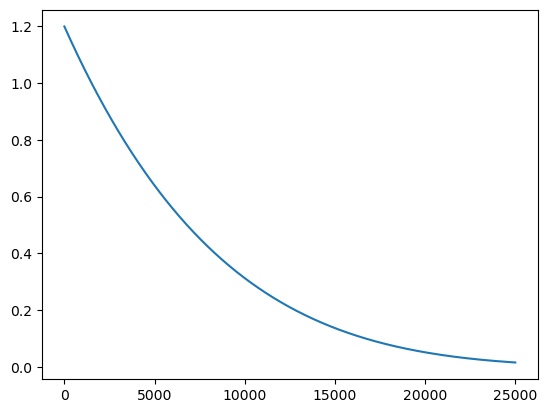

In [ ]:
test_h = np.arange(0, 25000)
test_rho = 1.2*(1 - 0.0065*test_h/288)**5.26
plt.plot(test_h, test_rho)

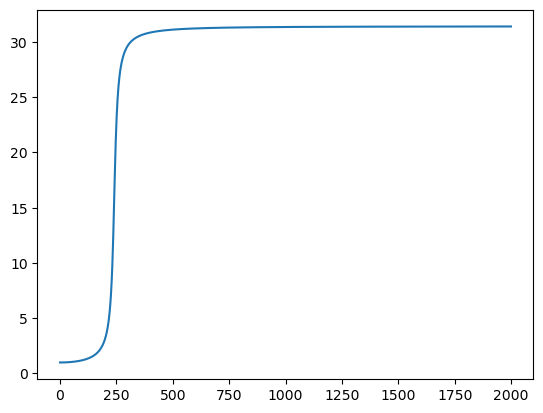

In [253]:
test_V = np.arange(0, 2000)
test_CWD = 10*(np.arctan(10*((test_V/(.7*c))**2 - 1)) + .5*np.pi)
plt.plot(test_V, test_CWD)